<a href="https://colab.research.google.com/github/rizkyfauziilmi/TUGAS_UAS_ML/blob/main/clustering_data_kecil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Rapids (GPU)

In [534]:
!nvidia-smi

Sun Jun  8 10:40:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   73C    P0             32W /   70W |     200MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [535]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
# !git clone https://github.com/rapidsai/rapidsai-csp-utils.git
# !python rapidsai-csp-utils/colab/pip-install.py

# Setup package lain

In [536]:
!pip install kagglehub hvplot holoviews bokeh

# 📊 Tugas Besar Pembelajaran Mesin - Clustering (Kecil)

## 👨‍🏫 Universitas Widyatama  
**Mata Kuliah:** Pembelajaran Mesin  
**Kelompok:**  
- Danang (23508018)  
- Iwan (23508019)  
- Sari (23508020)

---

### 📊 Tabel Kategori Ukuran Dataset

| Kategori       | Jumlah Baris (Row)      |
|----------------|--------------------------|
| **Kecil**       | < 1 mb                  |
| **Sedang**      | 1–2 mb           |
| **Besar**       | 2-3 mb         |
| **Sangat Besar**| 3-5 mb                |

---

## 📁 Struktur Notebook
1. 📥 **Import Library & Persiapan Lingkungan**
2. 📂 **Load Dataset**
3. 🧼 **Preprocessing & Normalisasi**
4. 🔁 **Implementasi K-Means (CPU & GPU)**
5. ⚖️ **Komparasi**
6. 🧪 **Evaluasi**
7. 📈 **Visualisasi Cluster**
8. 📊 **Significant Test: CPU vs GPU**
9. 📝 **Kesimpulan Akhir**

---

### 1. 📥 **Import Library & Persiapan Lingkungan**

- Download dataset dari Kaggle.

In [575]:
import kagglehub

path_df1 = kagglehub.dataset_download("zusmani/uberdrives")
path_df2 = kagglehub.dataset_download("rakeshkapilavai/extrovert-vs-introvert-behavior-data")
path_df3 = kagglehub.dataset_download("neuromusic/avocado-prices")
path_df4 = kagglehub.dataset_download("therohithanand/student-academic-performance-dataset")
path_df5 = kagglehub.dataset_download("mathchi/diabetes-data-set")

100%|██████████| 8.91k/8.91k [00:00<00:00, 11.4MB/s]

Extracting files...


---

### 2. 📂 **Load Dataset**

In [576]:
import cudf

df1 = cudf.read_csv(path_df1 + "/My Uber Drives - 2016.csv")
df2 = cudf.read_csv(path_df2 + "/personality_dataset.csv")
df3 = cudf.read_csv(path_df3 + "/avocado.csv", index_col=0)
df4 = cudf.read_csv(path_df4 + "/student_info.csv")
df5 = cudf.read_csv(path_df5 + "/diabetes.csv")

display(df1.head())
display(df2.head())
display(df3.head())
display(df4.head())
display(df5.head())

START_DATE*       END_DATE* CATEGORY*       START*            STOP*  \
0  1/1/2016 21:11  1/1/2016 21:17  Business  Fort Pierce      Fort Pierce   
1   1/2/2016 1:25   1/2/2016 1:37  Business  Fort Pierce      Fort Pierce   
2  1/2/2016 20:25  1/2/2016 20:38  Business  Fort Pierce      Fort Pierce   
3  1/5/2016 17:31  1/5/2016 17:45  Business  Fort Pierce      Fort Pierce   
4  1/6/2016 14:42  1/6/2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES*         PURPOSE*  
0     5.1   Meal/Entertain  
1     5.0             <NA>  
2     4.8  Errand/Supplies  
3     4.7          Meeting  
4    63.7   Customer Visit

Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  Conflicts_Over_Social_Media  \
0                    6     In Relationship                            3   
1                    8              Single                            0   
2                    5         Complicated                            4   
3                    7              Single                            1   
4                    6     In Relationship                            2   

   Addicted_Score  
0               8  
1               3  
2               9  
3               4  
4               7

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

---

### 3. 🧼 **Preprocessing & Normalisasi**

- Hapus Kolom yang Tidak digunakan untuk clustering

Dalam proses clustering, penting untuk memilih fitur yang relevan dan informatif agar algoritma dapat mengelompokkan data secara akurat. Fitur seperti ID unik, waktu mentah, dan label eksplisit sering kali tidak berguna atau bahkan mengganggu. Oleh karena itu, dilakukan proses pembersihan (dropping) terhadap kolom-kolom tersebut.

In [577]:
df1 = df1.drop(columns=['START_DATE*', 'END_DATE*', 'START*', 'STOP*'])
df2 = df2.drop(columns=['Personality'])
df3 = df3.drop(columns=['Date', 'region'])
df4 = df4.drop(columns=['Student_ID'])
df5 = df5.drop(columns=['Outcome'])

- Cek dan Tangani Missing Values (Null / NaN)

In [578]:
print("Missing Values Dataset 1:")
print(df1.isnull().sum())
print("Missing Values Dataset 2:")
print(df2.isnull().sum())
print("Missing Values Dataset 3:")
print(df3.isnull().sum())
print("Missing Values Dataset 4:")
print(df4.isnull().sum())
print("Missing Values Dataset 5:")
print(df5.isnull().sum())

Missing Values Dataset 1:
CATEGORY*      1
MILES*         0
PURPOSE*     503
dtype: int64
Missing Values Dataset 2:
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
dtype: int64
Missing Values Dataset 3:
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
dtype: int64
Missing Values Dataset 4:
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_S

In [579]:
import cupy as cp

def handle_missing_values(df: cudf.DataFrame) -> cudf.DataFrame:
    """
    Deteksi dan imputasi missing value berdasarkan tipe data:
    - Numerik: diisi median
    - Kategorikal: diisi modus
    """
    df_filled = df.copy()

    for col in df_filled.columns:
        if df_filled[col].isnull().sum() > 0:
            if df_filled[col].dtype in [cp.float64, cp.int64]:
                # Imputasi numerik dengan rata-rata
                median_val = df_filled[col].mean()
                df_filled[col].fillna(median_val, inplace=True)
                print(f"Imputasi kolom numerik '{col}' dengan mean: {median_val}")
            else:
                # Imputasi kategorikal dengan modus
                mode_val = df_filled[col].mode()[0]
                df_filled[col].fillna(mode_val, inplace=True)
                print(f"Imputasi kolom kategorikal '{col}' dengan modus: {mode_val}")

    return df_filled

In [580]:
df1 = handle_missing_values(df1)
df2 = handle_missing_values(df2)
df3 = handle_missing_values(df3)
df4 = handle_missing_values(df4)
df5 = handle_missing_values(df5)

Imputasi kolom kategorikal 'CATEGORY*' dengan modus: Business
Imputasi kolom kategorikal 'PURPOSE*' dengan modus: Meeting
Imputasi kolom numerik 'Time_spent_Alone' dengan mean: 4.505816002819881
Imputasi kolom kategorikal 'Stage_fear' dengan modus: No
Imputasi kolom numerik 'Social_event_attendance' dengan mean: 3.963354474982382
Imputasi kolom numerik 'Going_outside' dengan mean: 3.0
Imputasi kolom kategorikal 'Drained_after_socializing' dengan modus: No
Imputasi kolom numerik 'Friends_circle_size' dengan mean: 6.268862911795962
Imputasi kolom numerik 'Post_frequency' dengan mean: 3.564726631393298


In [581]:
print("Missing Values Dataset 1:")
print(df1.isnull().sum())
print("Missing Values Dataset 2:")
print(df2.isnull().sum())
print("Missing Values Dataset 3:")
print(df3.isnull().sum())
print("Missing Values Dataset 4:")
print(df4.isnull().sum())
print("Missing Values Dataset 5:")
print(df5.isnull().sum())

Missing Values Dataset 1:
CATEGORY*    0
MILES*       0
PURPOSE*     0
dtype: int64
Missing Values Dataset 2:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
dtype: int64
Missing Values Dataset 3:
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
dtype: int64
Missing Values Dataset 4:
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score         

- Cek Outlier

In [582]:
import hvplot.cudf
import holoviews as hv
hv.extension('bokeh')

def plot_boxplots_holoviews(dataframe, before_outlier=True):
    """
    Menampilkan boxplot interaktif dari cuDF DataFrame menggunakan Holoviews + Bokeh.
    """
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns.tolist()

    # Seragamkan tipe data agar melt() tidak error
    df_for_plot = dataframe[numeric_columns].astype('float64')

    melted = df_for_plot.melt(var_name='Kolom', value_name='Nilai')

    title = f"Boxplot Interaktif {'(Sebelum Outlier)' if before_outlier else '(Setelah Outlier)'}"
    return melted.hvplot.box(y='Nilai', by='Kolom', width=800, height=400, title=title)


def handle_outliers_iqr(dataframe: cudf.DataFrame) -> cudf.DataFrame:
    """
    Mendeteksi dan menangani outlier menggunakan IQR dan visualisasi Holoviews.
    """
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns
    total_outliers = 0
    columns_with_outliers = []

    if numeric_columns.empty:
        print("Tidak ada kolom numerik.")
        return dataframe

    df_no_outlier = dataframe.copy()

    print("Menampilkan boxplot sebelum outlier...")
    display(plot_boxplots_holoviews(dataframe, before_outlier=True))

    print("Mendeteksi outlier...")
    for col in numeric_columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        n_outliers = len(dataframe[(dataframe[col] < lower) | (dataframe[col] > upper)])
        total_outliers += n_outliers
        if n_outliers > 0:
            columns_with_outliers.append(col)
            lower_clip = dataframe[col].quantile(0.05)
            upper_clip = dataframe[col].quantile(0.95)
            df_no_outlier[col] = dataframe[col].clip(lower=lower_clip, upper=upper_clip)
            print(f"{n_outliers} outlier di kolom '{col}', sudah di-clip.")
        else:
            print(f"Tidak ada outlier di kolom '{col}'.")

    if total_outliers == 0:
        print("Tidak ada outlier yang perlu ditangani.")

    print("Menampilkan boxplot setelah penanganan outlier...")
    display(plot_boxplots_holoviews(df_no_outlier, before_outlier=False))

    return df_no_outlier

In [583]:
df1 = handle_outliers_iqr(df1)
df2 = handle_outliers_iqr(df2)
df3 = handle_outliers_iqr(df3)
df4 = handle_outliers_iqr(df4)
df5 = handle_outliers_iqr(df5)

Menampilkan boxplot sebelum outlier...


:BoxWhisker   [Kolom]   (Nilai)

Mendeteksi outlier...
78 outlier di kolom 'MILES*', sudah di-clip.
Menampilkan boxplot setelah penanganan outlier...


:BoxWhisker   [Kolom]   (Nilai)

Menampilkan boxplot sebelum outlier...


:BoxWhisker   [Kolom]   (Nilai)

Mendeteksi outlier...
Tidak ada outlier di kolom 'Time_spent_Alone'.
Tidak ada outlier di kolom 'Social_event_attendance'.
Tidak ada outlier di kolom 'Going_outside'.
Tidak ada outlier di kolom 'Friends_circle_size'.
Tidak ada outlier di kolom 'Post_frequency'.
Tidak ada outlier yang perlu ditangani.
Menampilkan boxplot setelah penanganan outlier...


:BoxWhisker   [Kolom]   (Nilai)

Menampilkan boxplot sebelum outlier...


:BoxWhisker   [Kolom]   (Nilai)

Mendeteksi outlier...
203 outlier di kolom 'AveragePrice', sudah di-clip.
2297 outlier di kolom 'Total Volume', sudah di-clip.
2518 outlier di kolom '4046', sudah di-clip.
2519 outlier di kolom '4225', sudah di-clip.
2918 outlier di kolom '4770', sudah di-clip.
2533 outlier di kolom 'Total Bags', sudah di-clip.
2407 outlier di kolom 'Small Bags', sudah di-clip.
2707 outlier di kolom 'Large Bags', sudah di-clip.
4014 outlier di kolom 'XLarge Bags', sudah di-clip.
Tidak ada outlier di kolom 'year'.
Menampilkan boxplot setelah penanganan outlier...


:BoxWhisker   [Kolom]   (Nilai)

Menampilkan boxplot sebelum outlier...


:BoxWhisker   [Kolom]   (Nilai)

Mendeteksi outlier...
Tidak ada outlier di kolom 'Age'.
3 outlier di kolom 'Avg_Daily_Usage_Hours', sudah di-clip.
Tidak ada outlier di kolom 'Sleep_Hours_Per_Night'.
Tidak ada outlier di kolom 'Mental_Health_Score'.
Tidak ada outlier di kolom 'Conflicts_Over_Social_Media'.
Tidak ada outlier di kolom 'Addicted_Score'.
Menampilkan boxplot setelah penanganan outlier...


:BoxWhisker   [Kolom]   (Nilai)

Menampilkan boxplot sebelum outlier...


:BoxWhisker   [Kolom]   (Nilai)

Mendeteksi outlier...
4 outlier di kolom 'Pregnancies', sudah di-clip.
5 outlier di kolom 'Glucose', sudah di-clip.
45 outlier di kolom 'BloodPressure', sudah di-clip.
1 outlier di kolom 'SkinThickness', sudah di-clip.
34 outlier di kolom 'Insulin', sudah di-clip.
19 outlier di kolom 'BMI', sudah di-clip.
29 outlier di kolom 'DiabetesPedigreeFunction', sudah di-clip.
9 outlier di kolom 'Age', sudah di-clip.
Menampilkan boxplot setelah penanganan outlier...


:BoxWhisker   [Kolom]   (Nilai)

- Ubah Data Kategori ke Numerik

In [584]:
def check_categorical_columns(df: cudf.DataFrame) -> None:
    """
    Print jumlah dan nama-nama kolom kategorikal dalam DataFrame,
    termasuk kolom bertipe bool.
    """
    # Cek kolom object, category, dan bool
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    num_categorical = len(categorical_cols)

    bool_cols = df.select_dtypes(include=['bool']).columns
    num_bool = len(bool_cols)

    for col in bool_cols:
        df[col] = df[col].astype('int8')
        print(f"Konversi kolom boolean '{col}' ke int8")

    print(f"Jumlah kolom kategorikal (termasuk bool): {num_categorical + num_bool}")
    print(f"Nama kolom kategorikal (termasuk bool): {list(categorical_cols) + list(bool_cols)}")

In [585]:
check_categorical_columns(df1)
check_categorical_columns(df2)
check_categorical_columns(df3)
check_categorical_columns(df4)
check_categorical_columns(df5)

Jumlah kolom kategorikal (termasuk bool): 2
Nama kolom kategorikal (termasuk bool): ['CATEGORY*', 'PURPOSE*']
Jumlah kolom kategorikal (termasuk bool): 2
Nama kolom kategorikal (termasuk bool): ['Stage_fear', 'Drained_after_socializing']
Jumlah kolom kategorikal (termasuk bool): 1
Nama kolom kategorikal (termasuk bool): ['type']
Jumlah kolom kategorikal (termasuk bool): 6
Nama kolom kategorikal (termasuk bool): ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Relationship_Status']
Jumlah kolom kategorikal (termasuk bool): 0
Nama kolom kategorikal (termasuk bool): []


In [586]:
from cuml.preprocessing import OrdinalEncoder

def encode_categorical_columns(df: cudf.DataFrame) -> cudf.DataFrame:
    df_encoded = df.copy()
    cat_cols = df_encoded.select_dtypes(include=['object', 'category']).columns

    if len(cat_cols) > 0:
        encoder = OrdinalEncoder()
        df_encoded[cat_cols] = encoder.fit_transform(df_encoded[cat_cols])
        print(f"Encoded columns: {list(cat_cols)}")
    else:
        print("No categorical columns found.")

    return df_encoded

In [587]:
df1 = encode_categorical_columns(df1)
df2 = encode_categorical_columns(df2)
df3 = encode_categorical_columns(df3)
df4 = encode_categorical_columns(df4)
df5 = encode_categorical_columns(df5)

Encoded columns: ['CATEGORY*', 'PURPOSE*']
Encoded columns: ['Stage_fear', 'Drained_after_socializing']
Encoded columns: ['type']
Encoded columns: ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Relationship_Status']
No categorical columns found.


In [588]:
check_categorical_columns(df1)
check_categorical_columns(df2)
check_categorical_columns(df3)
check_categorical_columns(df4)
check_categorical_columns(df5)

Jumlah kolom kategorikal (termasuk bool): 0
Nama kolom kategorikal (termasuk bool): []
Jumlah kolom kategorikal (termasuk bool): 0
Nama kolom kategorikal (termasuk bool): []
Jumlah kolom kategorikal (termasuk bool): 0
Nama kolom kategorikal (termasuk bool): []
Jumlah kolom kategorikal (termasuk bool): 0
Nama kolom kategorikal (termasuk bool): []
Jumlah kolom kategorikal (termasuk bool): 0
Nama kolom kategorikal (termasuk bool): []


- Pastikan Semua Kolom Bertipe Numerik

In [589]:
def is_all_numeric(df: cudf.DataFrame):
    """
    Mengembalikan True jika semua kolom dalam DataFrame bertipe numerik.
    Jika ada kolom non-numerik, mengembalikan False dan mencetak nama kolom tersebut.
    """
    non_numeric_cols = df.select_dtypes(exclude=['number']).columns

    if len(non_numeric_cols) == 0:
        print("Semua kolom bertipe numerik.")
    else:
        print("Ditemukan kolom non-numerik:")
        print(list(non_numeric_cols))

In [590]:
is_all_numeric(df1)
is_all_numeric(df2)
is_all_numeric(df3)
is_all_numeric(df4)
is_all_numeric(df5)

Semua kolom bertipe numerik.
Semua kolom bertipe numerik.
Semua kolom bertipe numerik.
Semua kolom bertipe numerik.
Semua kolom bertipe numerik.


- normalisasi kolom

In [591]:
from cuml.preprocessing import StandardScaler

def normalize_columns(df: cudf.DataFrame):
  scaler = StandardScaler()
  columns_to_normalize = df.select_dtypes(include=['number']).columns
  df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
  return df

In [592]:
df1 = normalize_columns(df1)
df2 = normalize_columns(df2)
df3 = normalize_columns(df3)
df4 = normalize_columns(df4)
df5 = normalize_columns(df5)

In [593]:
print("Dataset 1 setelah normalisasi:")
display(df1.head())
print("Dataset 2 setelah normalisasi:")
display(df2.head())
print("Dataset 3 setelah normalisasi:")
display(df3.head())
print("Dataset 4 setelah normalisasi:")
display(df4.head())
print("Dataset 5 setelah normalisasi:")
display(df5.head())

Dataset 1 setelah normalisasi:


CATEGORY*    MILES*  PURPOSE*
0  -0.267137 -0.422849 -0.256794
1  -0.267137 -0.437409  0.479816
2  -0.267137 -0.466531 -0.993403
3  -0.267137 -0.481092  0.479816
4  -0.267137  2.929773 -1.730013

Dataset 2 setelah normalisasi:


Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0         -0.147014   -0.972784                 0.012759       1.350613   
1          1.306226    1.027977                -1.379944      -1.350613   
2          1.306226    1.027977                -1.031768      -0.450204   
3         -1.309607   -0.972784                 0.709111       1.800817   
4         -0.437663   -0.972784                 1.753638       0.450204   

   Drained_after_socializing  Friends_circle_size  Post_frequency  
0                  -0.970772             1.590680        0.496104  
1                   1.030108            -1.481437       -0.195199  
2                   1.030108            -0.299853       -0.540850  
3                  -0.970772             1.826996        1.533059  
4                  -0.970772             0.409096        0.496104

Dataset 3 setelah normalisasi:


AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0     -0.187785     -0.457327 -0.466820 -0.351257 -0.418576   -0.507335   
1     -0.132870     -0.467162 -0.467974 -0.381072 -0.418193   -0.504176   
2     -1.286088     -0.400600 -0.467591 -0.185128 -0.415480   -0.509490   
3     -0.874224     -0.441822 -0.466517 -0.298037 -0.417658   -0.518610   
4     -0.325073     -0.471195 -0.467123 -0.383503 -0.417537   -0.517153   

   Small Bags  Large Bags  XLarge Bags      type      year  
0   -0.487008   -0.511187    -0.379677 -0.999836 -1.221282  
1   -0.482943   -0.511104    -0.379677 -0.999836 -1.221282  
2   -0.489845   -0.510994    -0.379677 -0.999836 -1.221282  
3   -0.501794   -0.510394    -0.379677 -0.999836 -1.221282  
4   -0.500234   -0.509141    -0.379677 -0.999836 -1.221282

Dataset 4 setelah normalisasi:


Age    Gender  Academic_Level   Country  Avg_Daily_Usage_Hours  \
0 -1.186915 -0.998583        0.980022 -1.575642               0.244843   
1  0.958662  1.001419       -1.061087 -0.627893              -1.776122   
2 -0.471723 -0.998583        0.980022  1.431011               0.924159   
3 -1.902108  1.001419       -0.040533  1.398330              -1.623276   
4  0.243470  1.001419       -1.061087 -1.314194              -0.349559   

   Most_Used_Platform  Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0           -0.744546                      0.745849              -0.327638   
1            1.036805                     -1.340753               0.560423   
2            0.739913                      0.745849              -1.659730   
3            2.224372                     -1.340753               0.116393   
4           -1.041438                      0.745849              -0.771668   

   Mental_Health_Score  Relationship_Status  Conflicts_Over_Social_Media  \
0            -0.205520            -0.855297                     0.157063   
1             1.605628             0.857726                    -2.976790   
2            -1.111095            -2.568320                     1.201681   
3             0.700054             0.857726                    -1.932172   
4            -0.205520            -0.855297                    -0.887554   

   Addicted_Score  
0        0.985550  
1       -2.166958  
2        1.616052  
3       -1.536456  
4        0.355048

Dataset 5 setelah normalisasi:


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.723226  0.920127       0.122755       0.964334 -0.800599  0.227082   
1    -0.878382 -1.254522      -0.338629       0.572339 -0.800599 -0.875716   
2     1.363869  2.059228      -0.492423      -1.322301 -0.800599 -1.395606   
3    -0.878382 -1.116449      -0.338629       0.180345  0.237960 -0.639402   
4    -1.198703  0.540426      -2.337960       0.964334  1.055549  1.723736   

   DiabetesPedigreeFunction       Age  
0                  0.613891  1.549874  
1                 -0.383993 -0.177443  
2                  0.776589 -0.086532  
3                 -1.049248 -1.086557  
4                  2.442802  0.004380

- membuat similarity matrix

In [594]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_similarity_matrix(similarity_cudf, max_items=100, cmap='viridis', annot=False):
    """
    Visualisasikan similarity matrix dari cuDF DataFrame menggunakan heatmap.

    Parameters:
        similarity_cudf (cudf.DataFrame): Similarity matrix dalam format cuDF DataFrame.
        max_items (int): Maksimal jumlah baris/kolom yang divisualisasikan (default: 100).
        cmap (str): Colormap untuk heatmap (default: 'viridis').
        annot (bool): Tampilkan nilai pada setiap sel (default: False).
    """
    # Konversi ke pandas DataFrame
    similarity_pd = similarity_cudf.to_pandas()

    # Jika matrix terlalu besar, ambil subset
    if similarity_pd.shape[0] > max_items or similarity_pd.shape[1] > max_items:
        similarity_pd = similarity_pd.iloc[:max_items, :max_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_pd, cmap=cmap, annot=annot, fmt=".2f")
    plt.title('Similarity Matrix Heatmap')
    plt.xlabel('Item')
    plt.ylabel('Item')
    plt.show()


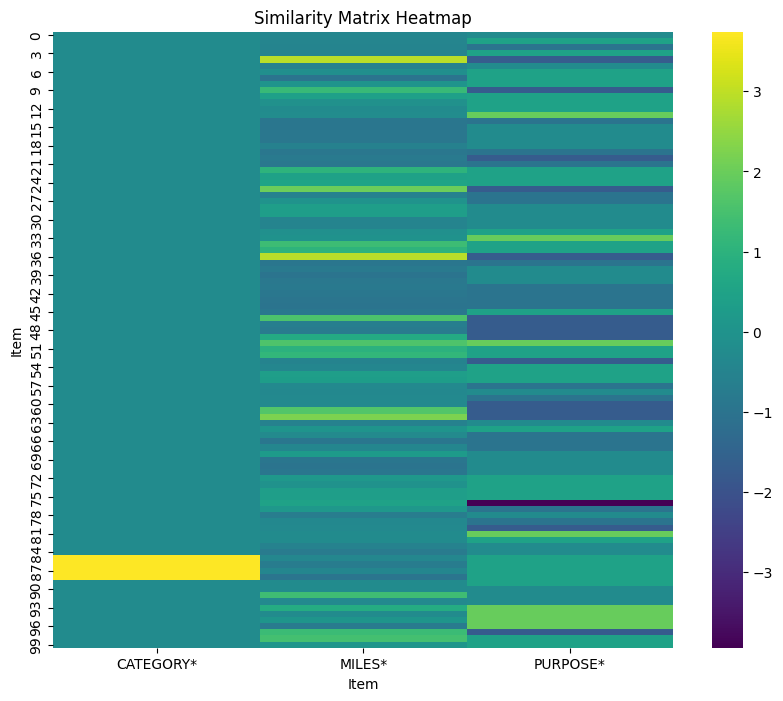

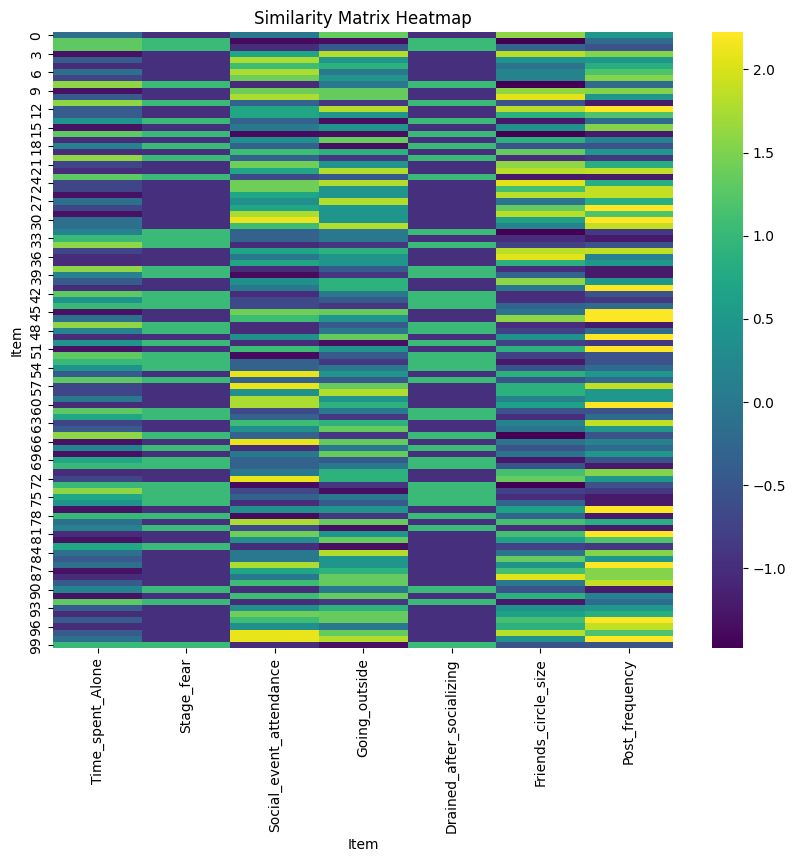

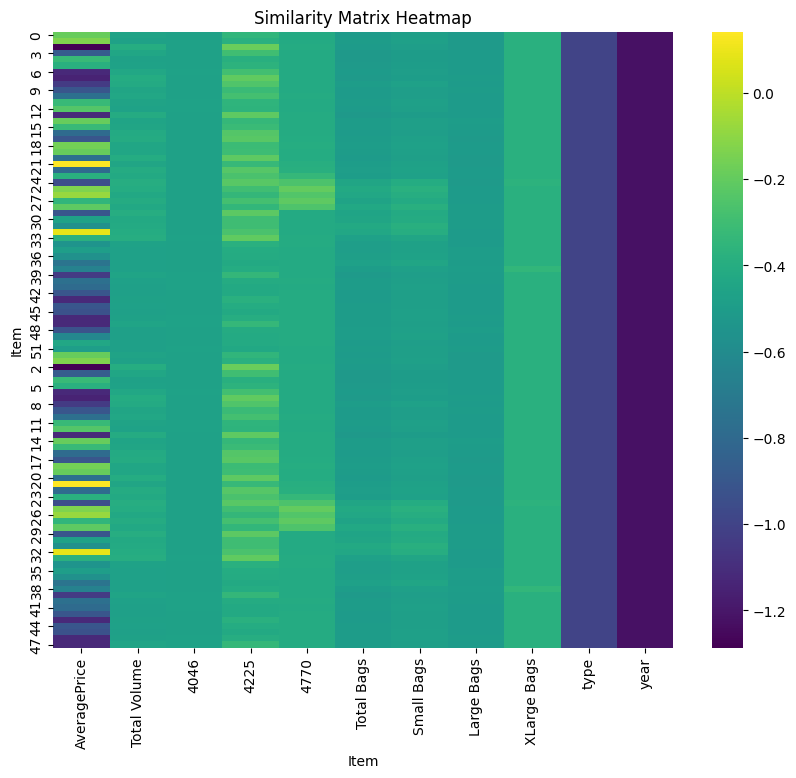

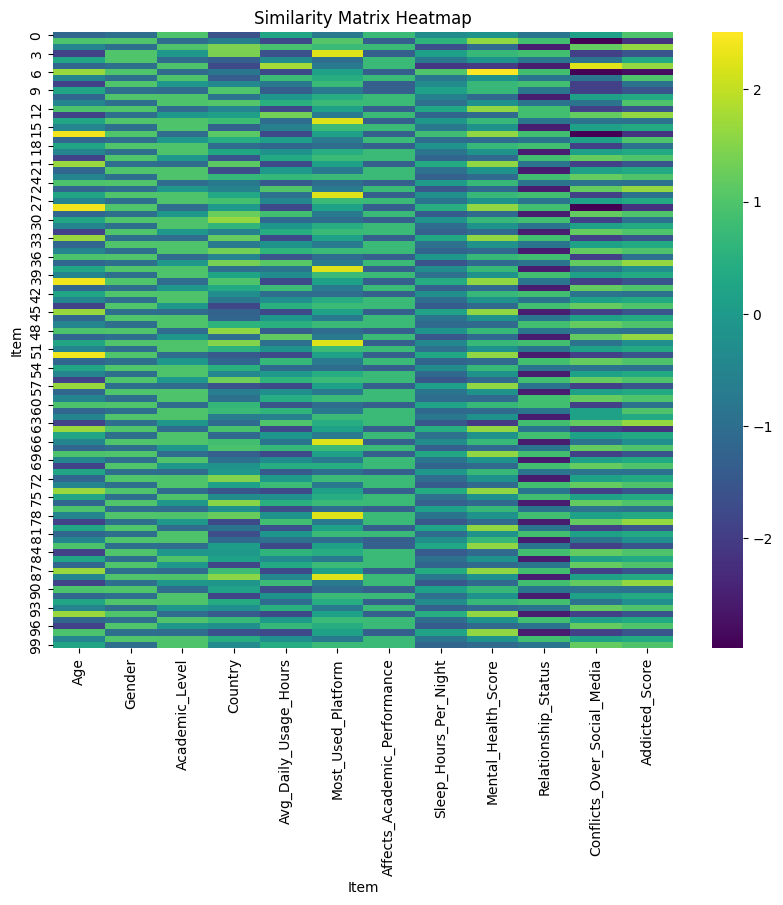

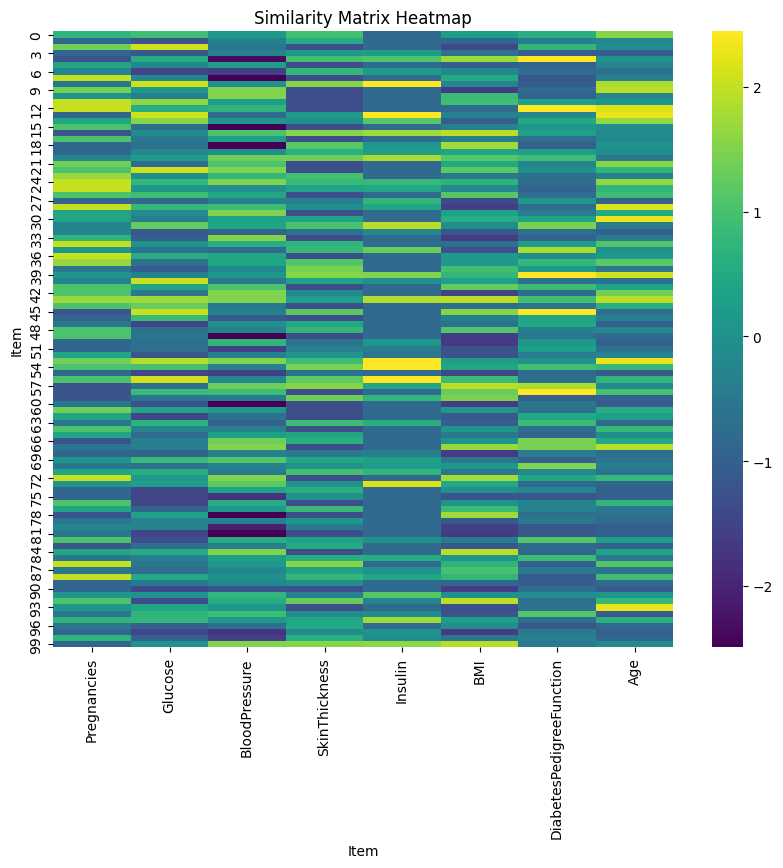

In [595]:
visualize_similarity_matrix(df1)
visualize_similarity_matrix(df2)
visualize_similarity_matrix(df3)
visualize_similarity_matrix(df4)
visualize_similarity_matrix(df5)

---

### 4. 🔁 **Implementasi K-Means (CPU & GPU)**

In [596]:
k = 3

In [597]:
from sklearn.cluster import KMeans as KMeans_CPU
from sklearn.metrics import silhouette_score as silhouette_score_cpu


kmeans_cpu = KMeans_CPU(n_clusters=k)

df1_np = df1.to_numpy()
df2_np = df2.to_numpy()
df3_np = df3.to_numpy()
df4_np = df4.to_numpy()
df5_np = df5.to_numpy()

# Clustering di CPU
df1_cluster_labels_cpu = kmeans_cpu.fit_predict(df1_np)
df2_cluster_labels_cpu = kmeans_cpu.fit_predict(df2_np)
df3_cluster_labels_cpu = kmeans_cpu.fit_predict(df3_np)
df4_cluster_labels_cpu = kmeans_cpu.fit_predict(df4_np)
df5_cluster_labels_cpu = kmeans_cpu.fit_predict(df5_np)

sil_score_df1_cpu = silhouette_score_cpu(df1_np, df1_cluster_labels_cpu)
print(f"Silhouette Score Dataset 1 (CPU): {sil_score_df1_cpu}")
sil_score_df2_cpu = silhouette_score_cpu(df2_np, df2_cluster_labels_cpu)
print(f"Silhouette Score Dataset 2 (CPU): {sil_score_df2_cpu}")
sil_score_df3_cpu = silhouette_score_cpu(df3_np, df3_cluster_labels_cpu)
print(f"Silhouette Score Dataset 3 (CPU): {sil_score_df3_cpu}")
sil_score_df4_cpu = silhouette_score_cpu(df4_np, df4_cluster_labels_cpu)
print(f"Silhouette Score Dataset 4 (CPU): {sil_score_df4_cpu}")
sil_score_df5_cpu = silhouette_score_cpu(df5_np, df5_cluster_labels_cpu)
print(f"Silhouette Score Dataset 5 (CPU): {sil_score_df5_cpu}")

Silhouette Score Dataset 1 (CPU): 0.39985083967055257
Silhouette Score Dataset 2 (CPU): 0.4279875713962956
Silhouette Score Dataset 3 (CPU): 0.4873403797809314
Silhouette Score Dataset 4 (CPU): 0.2601117690456165
Silhouette Score Dataset 5 (CPU): 0.18635167474544764


In [598]:
from cuml.cluster import KMeans as KMeans_GPU
from cuml.metrics.cluster import silhouette_score as silhouette_score_gpu


kmeans_gpu = KMeans_GPU(n_clusters=k, n_init='auto')

# Clustering di GPU
df1_cluster_labels_gpu = kmeans_gpu.fit_predict(df1)
df2_cluster_labels_gpu = kmeans_gpu.fit_predict(df2)
df3_cluster_labels_gpu = kmeans_gpu.fit_predict(df3)
df4_cluster_labels_gpu = kmeans_gpu.fit_predict(df4)
df5_cluster_labels_gpu = kmeans_gpu.fit_predict(df5)

sil_score_df1_gpu = silhouette_score_gpu(df1, df1_cluster_labels_gpu)
print(f"Silhouette Score Dataset 1 (GPU): {sil_score_df1_gpu}")
sil_score_df2_gpu = silhouette_score_gpu(df2, df2_cluster_labels_gpu)
print(f"Silhouette Score Dataset 2 (GPU): {sil_score_df2_gpu}")
sil_score_df3_gpu = silhouette_score_gpu(df3, df3_cluster_labels_gpu)
print(f"Silhouette Score Dataset 3 (GPU): {sil_score_df3_gpu}")
sil_score_df4_gpu = silhouette_score_gpu(df4, df4_cluster_labels_gpu)
print(f"Silhouette Score Dataset 4 (GPU): {sil_score_df4_gpu}")
sil_score_df5_gpu = silhouette_score_gpu(df5, df5_cluster_labels_gpu)
print(f"Silhouette Score Dataset 5 (GPU): {sil_score_df5_gpu}")

Silhouette Score Dataset 1 (GPU): 0.4951172160770149
Silhouette Score Dataset 2 (GPU): 0.43891237937972094
Silhouette Score Dataset 3 (GPU): 0.6017802899557235
Silhouette Score Dataset 4 (GPU): 0.2601117690456165
Silhouette Score Dataset 5 (GPU): 0.1863516747454477


---

### 5. ⚖️ **Komparasi**

In [599]:
def compare_silhouette_scores(cpu_scores, gpu_scores, dataset_names=None):
    """
    Membandingkan silhouette score hasil clustering CPU vs GPU.

    Args:
        cpu_scores (list): List silhouette score dari KMeans CPU.
        gpu_scores (list): List silhouette score dari KMeans GPU.
        dataset_names (list, optional): Nama-nama dataset.
    """
    if dataset_names is None:
        dataset_names = [f"Dataset {i+1}" for i in range(len(cpu_scores))]

    for i, (cpu, gpu) in enumerate(zip(cpu_scores, gpu_scores)):
        diff = gpu - cpu
        percent = abs(100 * diff / cpu) if cpu != 0 else float('inf')
        if abs(diff) < 1e-8:
          print(f"{dataset_names[i]}: Skor sama (CPU & GPU = {cpu:.6f})")
        elif diff > 0:
          print(f"{dataset_names[i]}: GPU lebih unggul {percent:.2f}% (GPU: {gpu:.6f}, CPU: {cpu:.6f})")
        else:
          print(f"{dataset_names[i]}: CPU lebih unggul {percent:.2f}% (CPU: {cpu:.6f}, GPU: {gpu:.6f})")

In [600]:
cpu_scores = [
    sil_score_df1_cpu,
    sil_score_df2_cpu,
    sil_score_df3_cpu,
    sil_score_df4_cpu,
    sil_score_df5_cpu,
]
gpu_scores = [
    sil_score_df1_gpu,
    sil_score_df2_gpu,
    sil_score_df3_gpu,
    sil_score_df4_gpu,
    sil_score_df5_gpu,
]
dataset_names = [f"Dataset {i+1}" for i in range(5)]

compare_silhouette_scores(cpu_scores, gpu_scores, dataset_names)

Dataset 1: GPU lebih unggul 23.83% (GPU: 0.495117, CPU: 0.399851)
Dataset 2: GPU lebih unggul 2.55% (GPU: 0.438912, CPU: 0.427988)
Dataset 3: GPU lebih unggul 23.48% (GPU: 0.601780, CPU: 0.487340)
Dataset 4: Skor sama (CPU & GPU = 0.260112)
Dataset 5: Skor sama (CPU & GPU = 0.186352)


---

### 6. 🧪 **Evaluasi**

- mencari optimal k dengan elbow method

In [601]:
def kmeans_metrics_cpu(X, max_k=12, random_state=42, max_iter=1000):
    inertia = []
    silhouette_scores = []
    k_values = range(2, max_k + 1)
    for k in k_values:
        kmeans = KMeans_CPU(n_clusters=k, random_state=random_state, max_iter=max_iter)
        cluster_labels = kmeans.fit_predict(X)
        sil_score = silhouette_score_cpu(X, cluster_labels)
        silhouette_scores.append(sil_score)
        inertia.append(kmeans.inertia_)
    return k_values, inertia, silhouette_scores

In [602]:
def kmeans_metrics_gpu(X_cudf, max_k=12, random_state=42, max_iter=1000):
    inertia = []
    silhouette_scores = []
    k_values = range(2, max_k + 1)
    for k in k_values:
        kmeans = KMeans_GPU(n_clusters=k, random_state=random_state, max_iter=max_iter, n_init='auto')
        cluster_labels = kmeans.fit_predict(X_cudf)
        # Konversi ke numpy untuk silhouette_score scikit-learn
        cluster_labels_np = cluster_labels.to_numpy()
        X_np = X_cudf.to_numpy()
        sil_score = silhouette_score_cpu(X_np, cluster_labels_np)
        silhouette_scores.append(sil_score)
        inertia.append(float(kmeans.inertia_))  # cuML inertia_ bertipe cupy scalar
    return k_values, inertia, silhouette_scores


In [603]:
def plot_elbow_and_silhouette(k_values, inertia, silhouette_scores, title_suffix="CPU"):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(k_values, inertia, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(k_values)
    plt.title(f'Elbow Method - {title_suffix}')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_scores, marker='o', color='orange')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Scores for Different k Values - {title_suffix}')
    plt.xticks(k_values)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

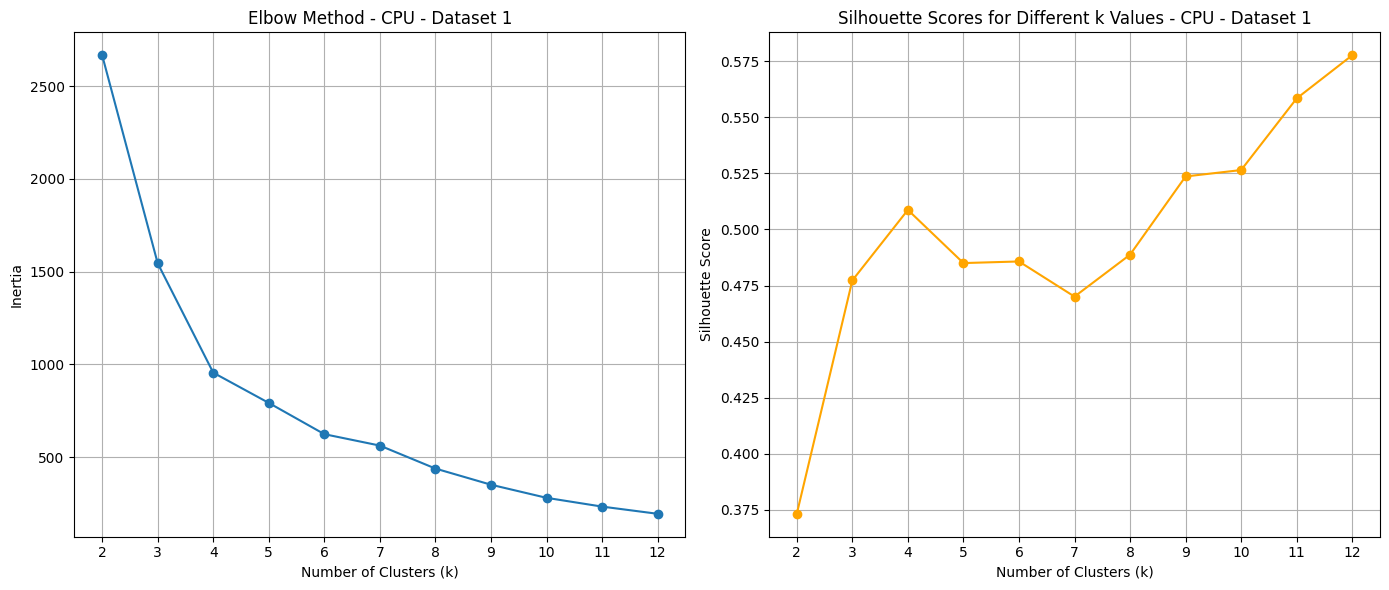

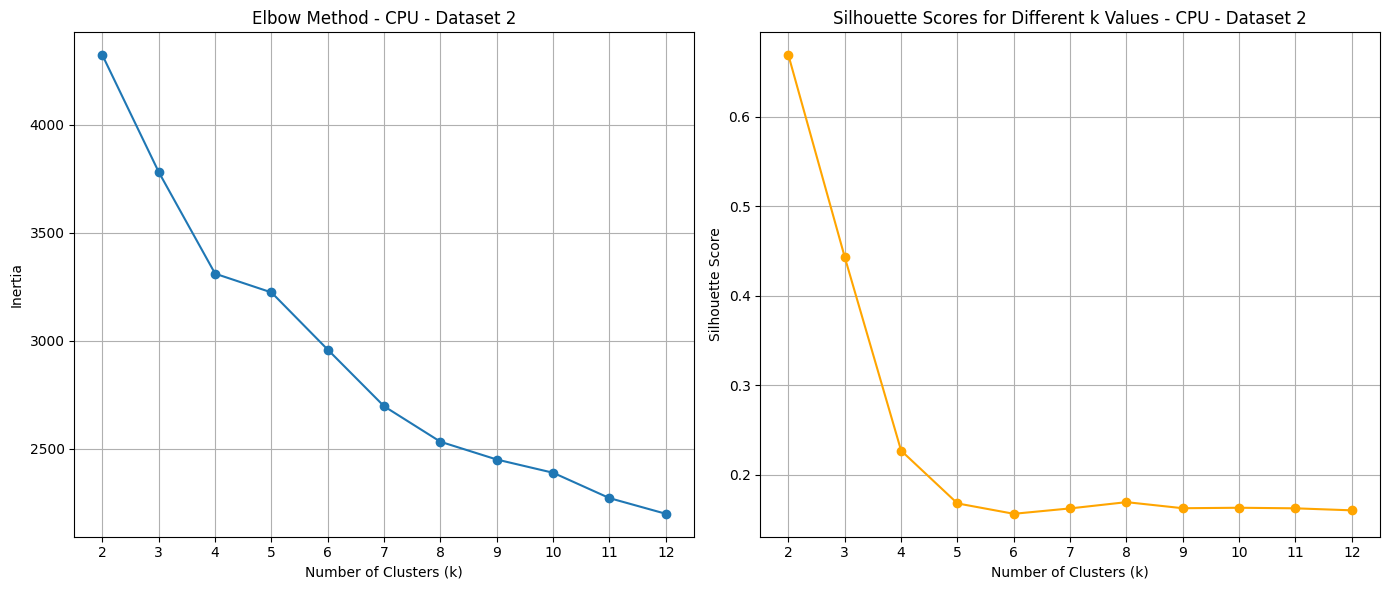

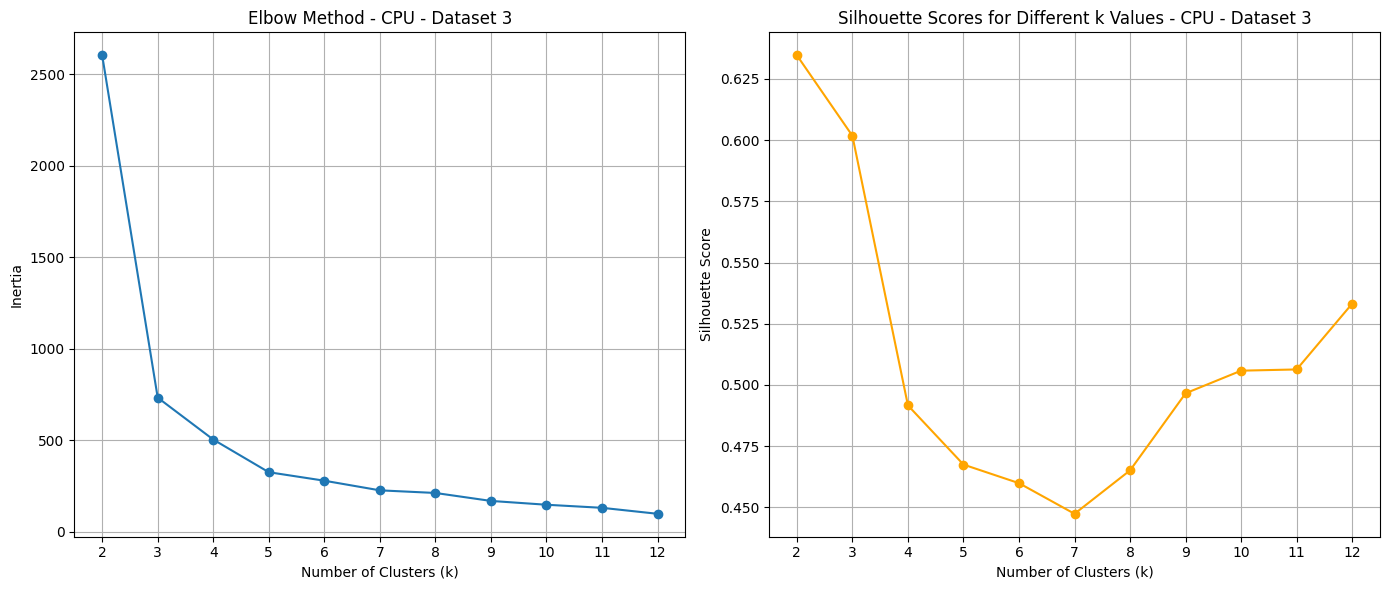

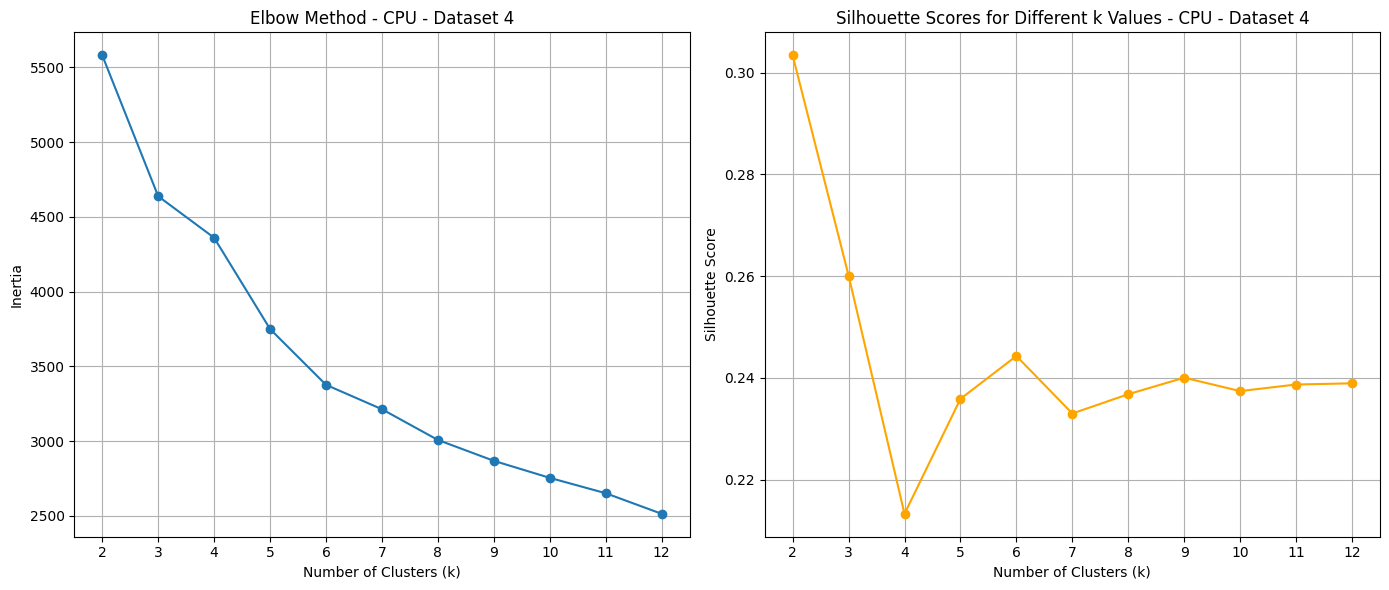

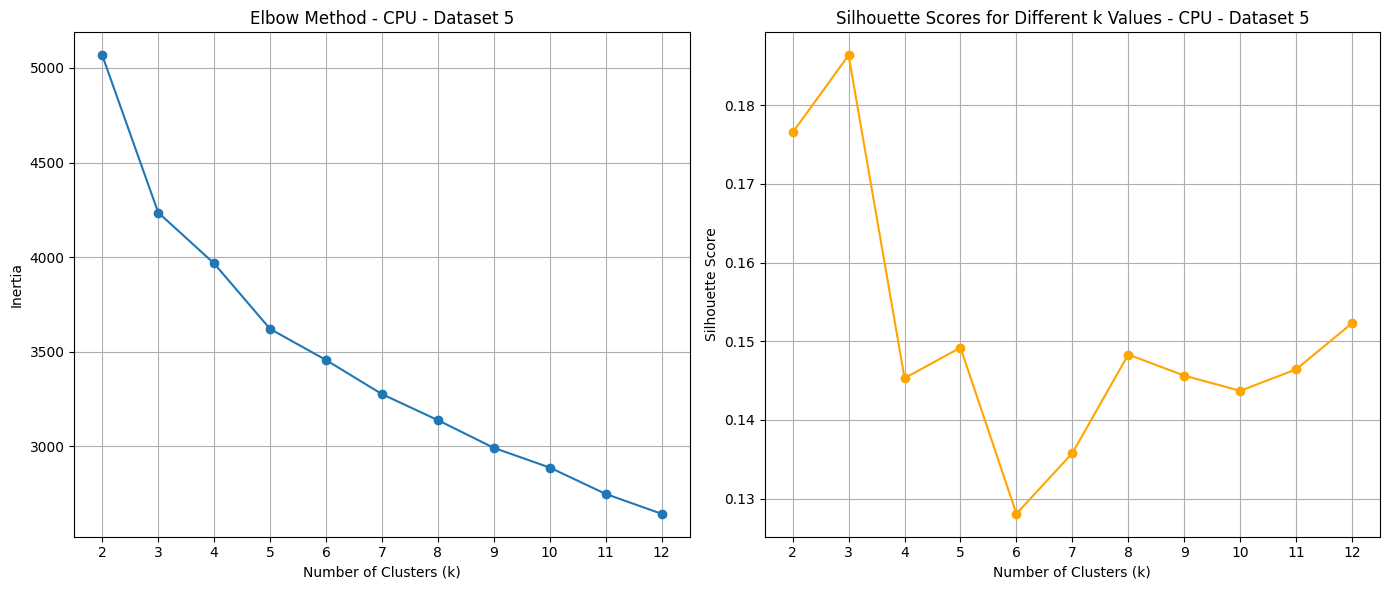

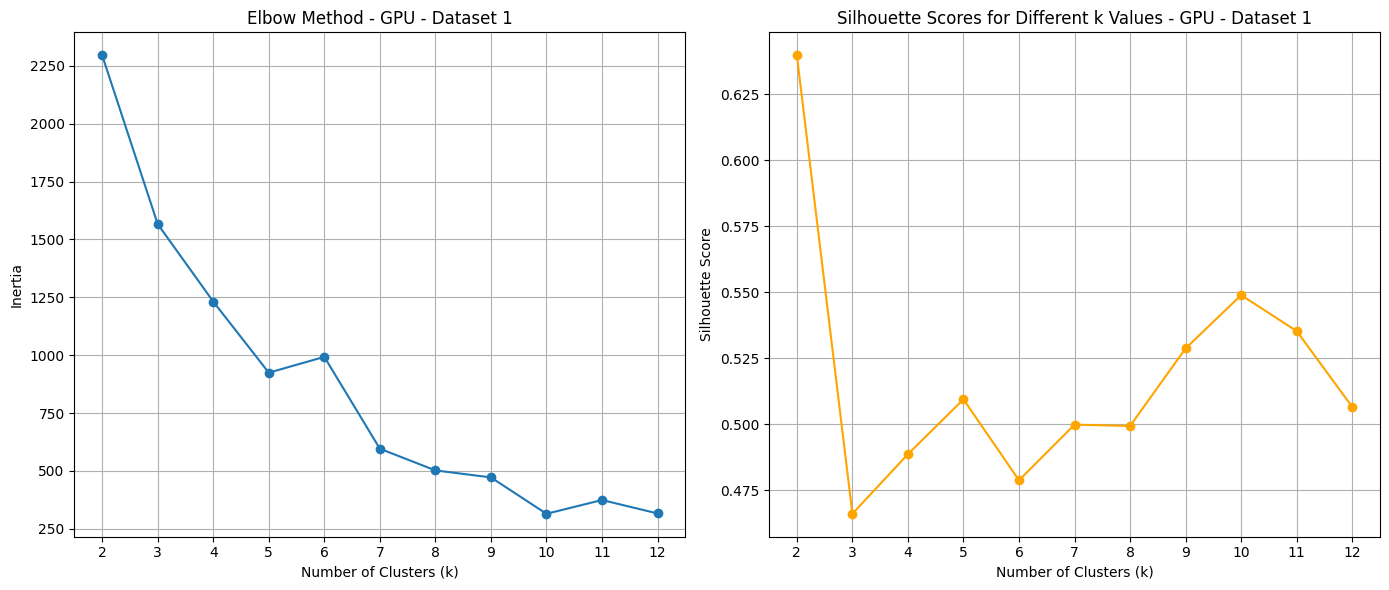

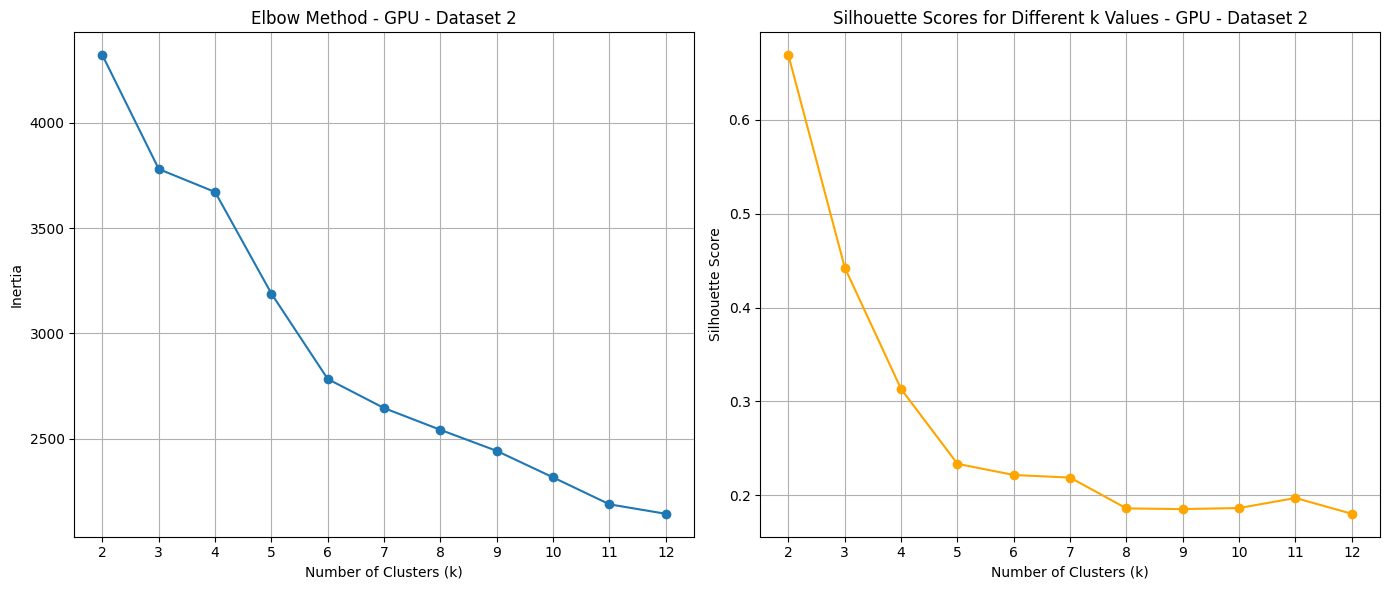

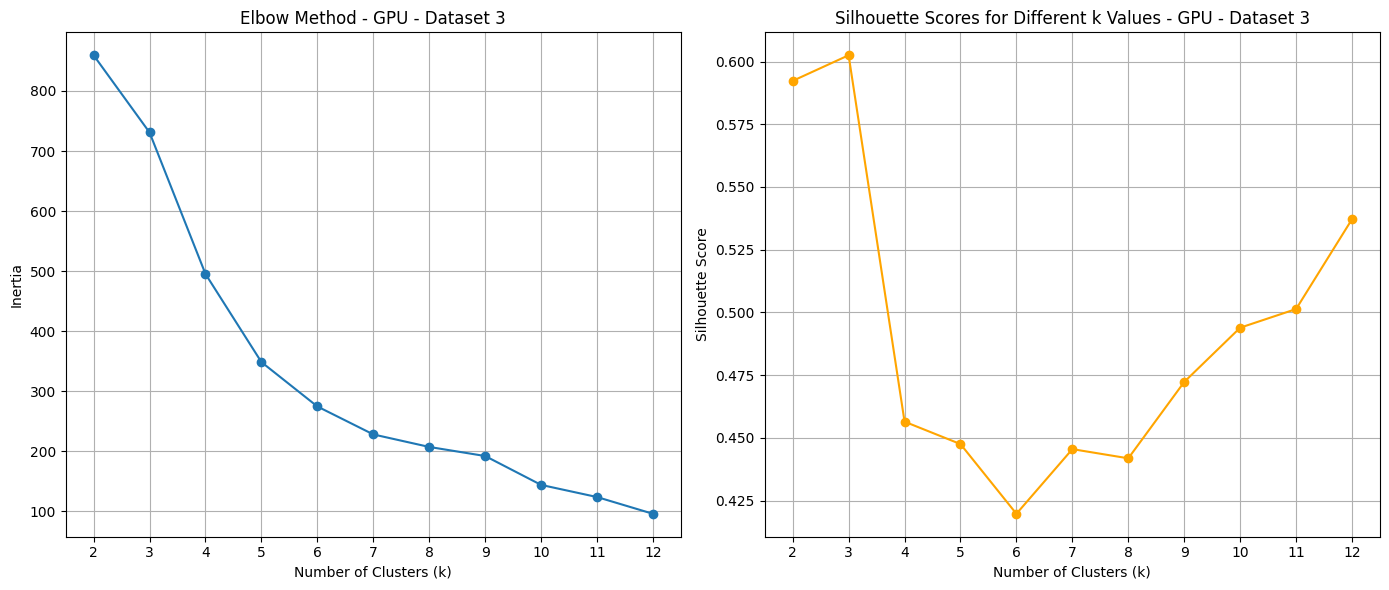

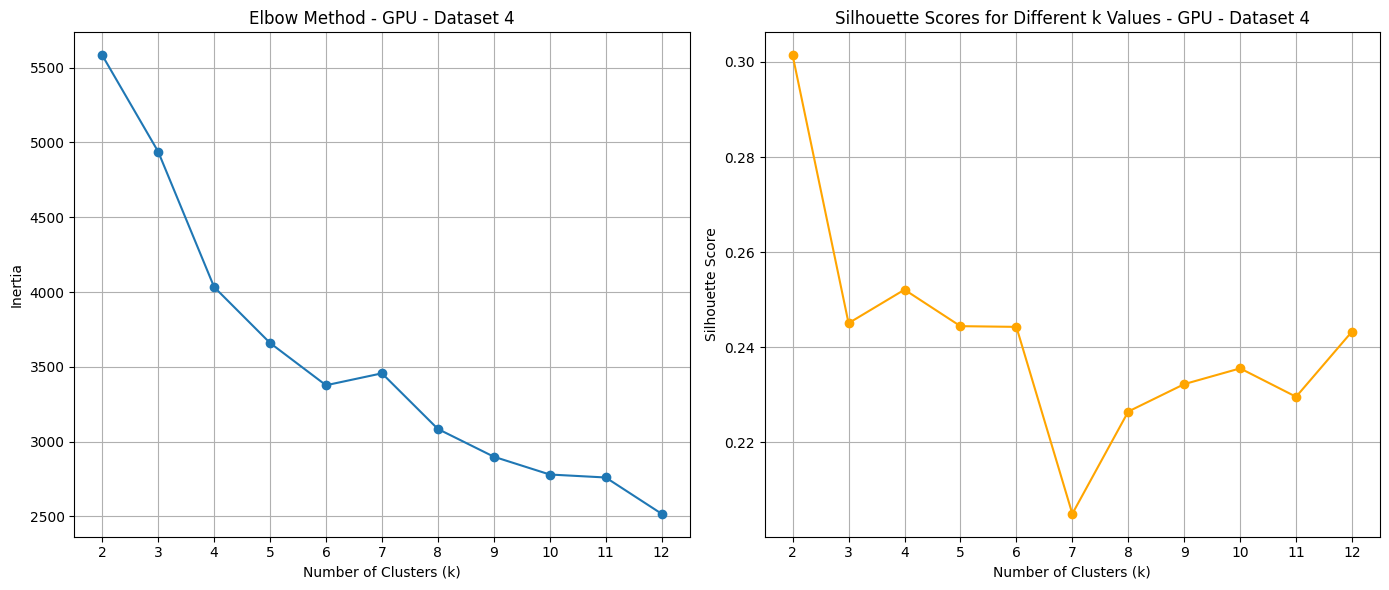

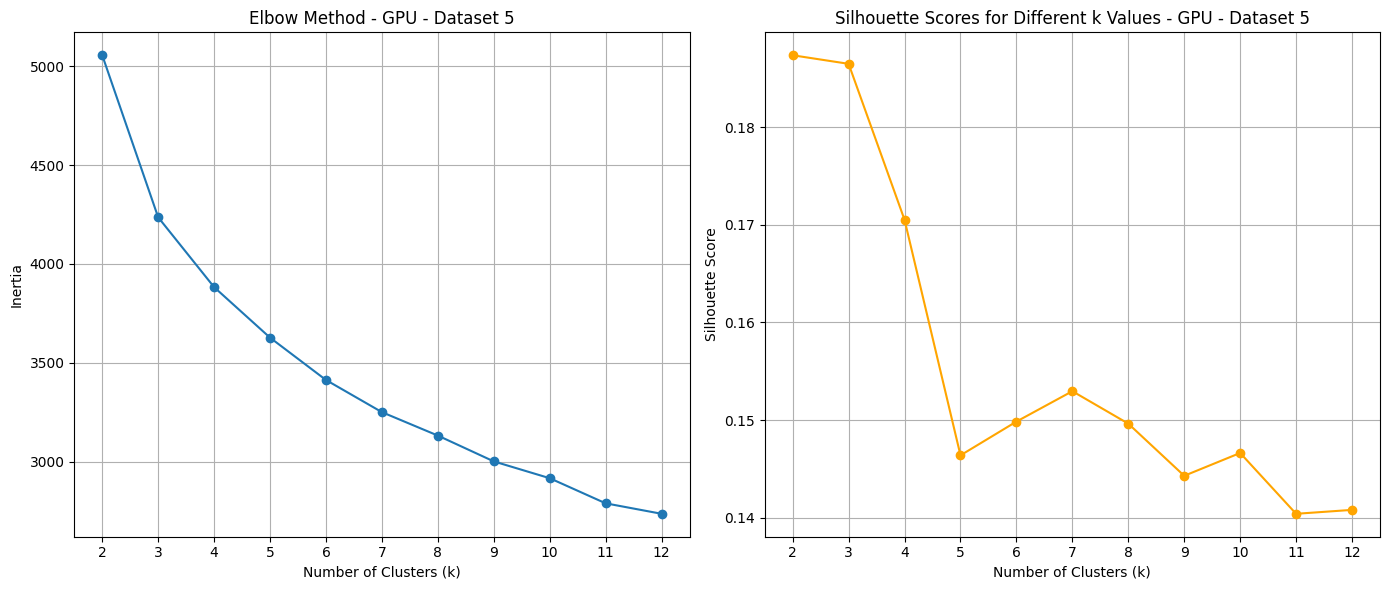

In [604]:
# Untuk CPU
for i, df_np in enumerate([df1_np, df2_np, df3_np, df4_np, df5_np], start=1):
    k_values, inertia_cpu, sil_cpu = kmeans_metrics_cpu(df_np, max_k=12)
    plot_elbow_and_silhouette(
        k_values, inertia_cpu, sil_cpu,
        title_suffix=f"CPU - Dataset {i}"
    )

# Untuk GPU
for i, df_cudf in enumerate([df1, df2, df3, df4, df5], start=1):
    k_values, inertia_gpu, sil_gpu = kmeans_metrics_gpu(df_cudf, max_k=12)
    plot_elbow_and_silhouette(
        k_values, inertia_gpu, sil_gpu,
        title_suffix=f"GPU - Dataset {i}"
    )


In [605]:
k_optimal_df1_cpu = 4
k_optimal_df2_cpu = 3
k_optimal_df3_cpu = 4
k_optimal_df4_cpu = 6
k_optimal_df5_cpu = 5

k_optimal_df1_gpu = 2
k_optimal_df2_gpu = 2
k_optimal_df3_gpu = 3
k_optimal_df4_gpu = 2
k_optimal_df5_gpu = 3

In [606]:
kmeans_optimal_df1_cpu = KMeans_CPU(n_clusters=k_optimal_df1_cpu, random_state=42, max_iter=1000)
kmeans_optimal_df2_cpu = KMeans_CPU(n_clusters=k_optimal_df2_cpu, random_state=42, max_iter=1000)
kmeans_optimal_df3_cpu = KMeans_CPU(n_clusters=k_optimal_df3_cpu, random_state=42, max_iter=1000)
kmeans_optimal_df4_cpu = KMeans_CPU(n_clusters=k_optimal_df4_cpu, random_state=42, max_iter=1000)
kmeans_optimal_df5_cpu = KMeans_CPU(n_clusters=k_optimal_df5_cpu, random_state=42, max_iter=1000)

kmeans_optimal_df1_gpu = KMeans_GPU(n_clusters=k_optimal_df1_gpu, random_state=42, max_iter=1000, n_init='auto')
kmeans_optimal_df2_gpu = KMeans_GPU(n_clusters=k_optimal_df2_gpu, random_state=42, max_iter=1000, n_init='auto')
kmeans_optimal_df3_gpu = KMeans_GPU(n_clusters=k_optimal_df3_gpu, random_state=42, max_iter=1000, n_init='auto')
kmeans_optimal_df4_gpu = KMeans_GPU(n_clusters=k_optimal_df4_gpu, random_state=42, max_iter=1000, n_init='auto')
kmeans_optimal_df5_gpu = KMeans_GPU(n_clusters=k_optimal_df5_gpu, random_state=42, max_iter=1000, n_init='auto')

In [607]:
df1_cluster_labels_optimal_cpu = kmeans_optimal_df1_cpu.fit_predict(df1_np)
df2_cluster_labels_optimal_cpu = kmeans_optimal_df2_cpu.fit_predict(df2_np)
df3_cluster_labels_optimal_cpu = kmeans_optimal_df3_cpu.fit_predict(df3_np)
df4_cluster_labels_optimal_cpu = kmeans_optimal_df4_cpu.fit_predict(df4_np)
df5_cluster_labels_optimal_cpu = kmeans_optimal_df5_cpu.fit_predict(df5_np)

sil_score_df1_optimal_cpu = silhouette_score_cpu(df1_np, df1_cluster_labels_optimal_cpu)
print(f"Silhouette Score Dataset 1 (CPU): {sil_score_df1_optimal_cpu}")
sil_score_df2_optimal_cpu = silhouette_score_cpu(df2_np, df2_cluster_labels_optimal_cpu)
print(f"Silhouette Score Dataset 2 (CPU): {sil_score_df2_optimal_cpu}")
sil_score_df3_optimal_cpu = silhouette_score_cpu(df3_np, df3_cluster_labels_optimal_cpu)
print(f"Silhouette Score Dataset 3 (CPU): {sil_score_df3_optimal_cpu}")
sil_score_df4_optimal_cpu = silhouette_score_cpu(df4_np, df4_cluster_labels_optimal_cpu)
print(f"Silhouette Score Dataset 4 (CPU): {sil_score_df4_optimal_cpu}")
sil_score_df5_optimal_cpu = silhouette_score_cpu(df5_np, df5_cluster_labels_optimal_cpu)
print(f"Silhouette Score Dataset 5 (CPU): {sil_score_df5_optimal_cpu}")

Silhouette Score Dataset 1 (CPU): 0.5087269001367357
Silhouette Score Dataset 2 (CPU): 0.4430801483909924
Silhouette Score Dataset 3 (CPU): 0.49162956579349276
Silhouette Score Dataset 4 (CPU): 0.24428915132690648
Silhouette Score Dataset 5 (CPU): 0.14918468161088905


In [608]:
df1_cluster_labels_optimal_gpu = kmeans_optimal_df1_gpu.fit_predict(df1)
df2_cluster_labels_optimal_gpu = kmeans_optimal_df2_gpu.fit_predict(df2)
df3_cluster_labels_optimal_gpu = kmeans_optimal_df3_gpu.fit_predict(df3)
df4_cluster_labels_optimal_gpu = kmeans_optimal_df4_gpu.fit_predict(df4)
df5_cluster_labels_optimal_gpu = kmeans_optimal_df5_gpu.fit_predict(df5)

sil_score_df1_optimal_gpu = silhouette_score_gpu(df1, df1_cluster_labels_optimal_gpu)
print(f"Silhouette Score Dataset 1 (GPU): {sil_score_df1_optimal_gpu}")
sil_score_df2_optimal_gpu = silhouette_score_gpu(df2, df2_cluster_labels_optimal_gpu)
print(f"Silhouette Score Dataset 2 (GPU): {sil_score_df2_optimal_gpu}")
sil_score_df3_optimal_gpu = silhouette_score_gpu(df3, df3_cluster_labels_optimal_gpu)
print(f"Silhouette Score Dataset 3 (GPU): {sil_score_df3_optimal_gpu}")
sil_score_df4_optimal_gpu = silhouette_score_gpu(df4, df4_cluster_labels_optimal_gpu)
print(f"Silhouette Score Dataset 4 (GPU): {sil_score_df4_optimal_gpu}")
sil_score_df5_optimal_gpu = silhouette_score_gpu(df5, df5_cluster_labels_optimal_gpu)
print(f"Silhouette Score Dataset 5 (GPU): {sil_score_df5_optimal_gpu}")

Silhouette Score Dataset 1 (GPU): 0.6398511890775602
Silhouette Score Dataset 2 (GPU): 0.6688286868041285
Silhouette Score Dataset 3 (GPU): 0.6024947492165796
Silhouette Score Dataset 4 (GPU): 0.3013944238089398
Silhouette Score Dataset 5 (GPU): 0.18646654201018942


In [609]:
cpu_scores_optimal = [
    sil_score_df1_optimal_cpu,
    sil_score_df2_optimal_cpu,
    sil_score_df3_optimal_cpu,
    sil_score_df4_optimal_cpu,
    sil_score_df5_optimal_cpu,
]
gpu_scores_optimal = [
    sil_score_df1_optimal_gpu,
    sil_score_df2_optimal_gpu,
    sil_score_df3_optimal_gpu,
    sil_score_df4_optimal_gpu,
    sil_score_df5_optimal_gpu,
]
dataset_names = [f"Dataset (optimal) {i+1}" for i in range(5)]

compare_silhouette_scores(cpu_scores_optimal, gpu_scores_optimal, dataset_names)

Dataset (optimal) 1: GPU lebih unggul 25.77% (GPU: 0.639851, CPU: 0.508727)
Dataset (optimal) 2: GPU lebih unggul 50.95% (GPU: 0.668829, CPU: 0.443080)
Dataset (optimal) 3: GPU lebih unggul 22.55% (GPU: 0.602495, CPU: 0.491630)
Dataset (optimal) 4: GPU lebih unggul 23.38% (GPU: 0.301394, CPU: 0.244289)
Dataset (optimal) 5: GPU lebih unggul 24.99% (GPU: 0.186467, CPU: 0.149185)


---

### 7. 📈 **Visualisasi Cluster**

In [610]:
from cuml.decomposition import PCA

def get_pca_2d(X):
    """Reduksi seluruh fitur ke 2D dengan PCA (menggunakan cuML, GPU)."""
    # Jika X adalah cuDF, konversi ke cupy dulu
    if hasattr(X, "to_cupy"):
        X_cupy = X.to_cupy()
    else:
        X_cupy = X
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_cupy)
    # Jika hasilnya cupy, konversi ke numpy untuk matplotlib
    if hasattr(X_pca, "get"):
        X_pca = X_pca.get()
    return X_pca

def plot_all_clusters_pca_subplot(datasets_cudf, datasets_np, cpu_labels, gpu_labels, dataset_names):
    """
    Visualisasi semua hasil clustering (CPU & GPU) dalam 1 canvas subplot grid.
    """
    n = len(datasets_cudf)
    fig, axes = plt.subplots(n, 2, figsize=(12, 4*n))
    for i in range(n):
        # CPU
        X_pca_cpu = get_pca_2d(datasets_np[i])
        ax_cpu = axes[i, 0] if n > 1 else axes[0]
        scatter_cpu = ax_cpu.scatter(X_pca_cpu[:, 0], X_pca_cpu[:, 1], c=cpu_labels[i], cmap='viridis', alpha=0.7)
        ax_cpu.set_title(f"{dataset_names[i]} - CPU")
        ax_cpu.set_xlabel("PCA 1")
        ax_cpu.set_ylabel("PCA 2")
        fig.colorbar(scatter_cpu, ax=ax_cpu, label='Cluster')

        # GPU
        X_pca_gpu = get_pca_2d(datasets_cudf[i])
        # Pastikan label GPU dalam bentuk numpy
        labels_gpu = gpu_labels[i].to_numpy() if hasattr(gpu_labels[i], "to_numpy") else gpu_labels[i]
        ax_gpu = axes[i, 1] if n > 1 else axes[1]
        scatter_gpu = ax_gpu.scatter(X_pca_gpu[:, 0], X_pca_gpu[:, 1], c=labels_gpu, cmap='viridis', alpha=0.7)
        ax_gpu.set_title(f"{dataset_names[i]} - GPU")
        ax_gpu.set_xlabel("PCA 1")
        ax_gpu.set_ylabel("PCA 2")
        fig.colorbar(scatter_gpu, ax=ax_gpu, label='Cluster')

    plt.tight_layout()
    plt.show()

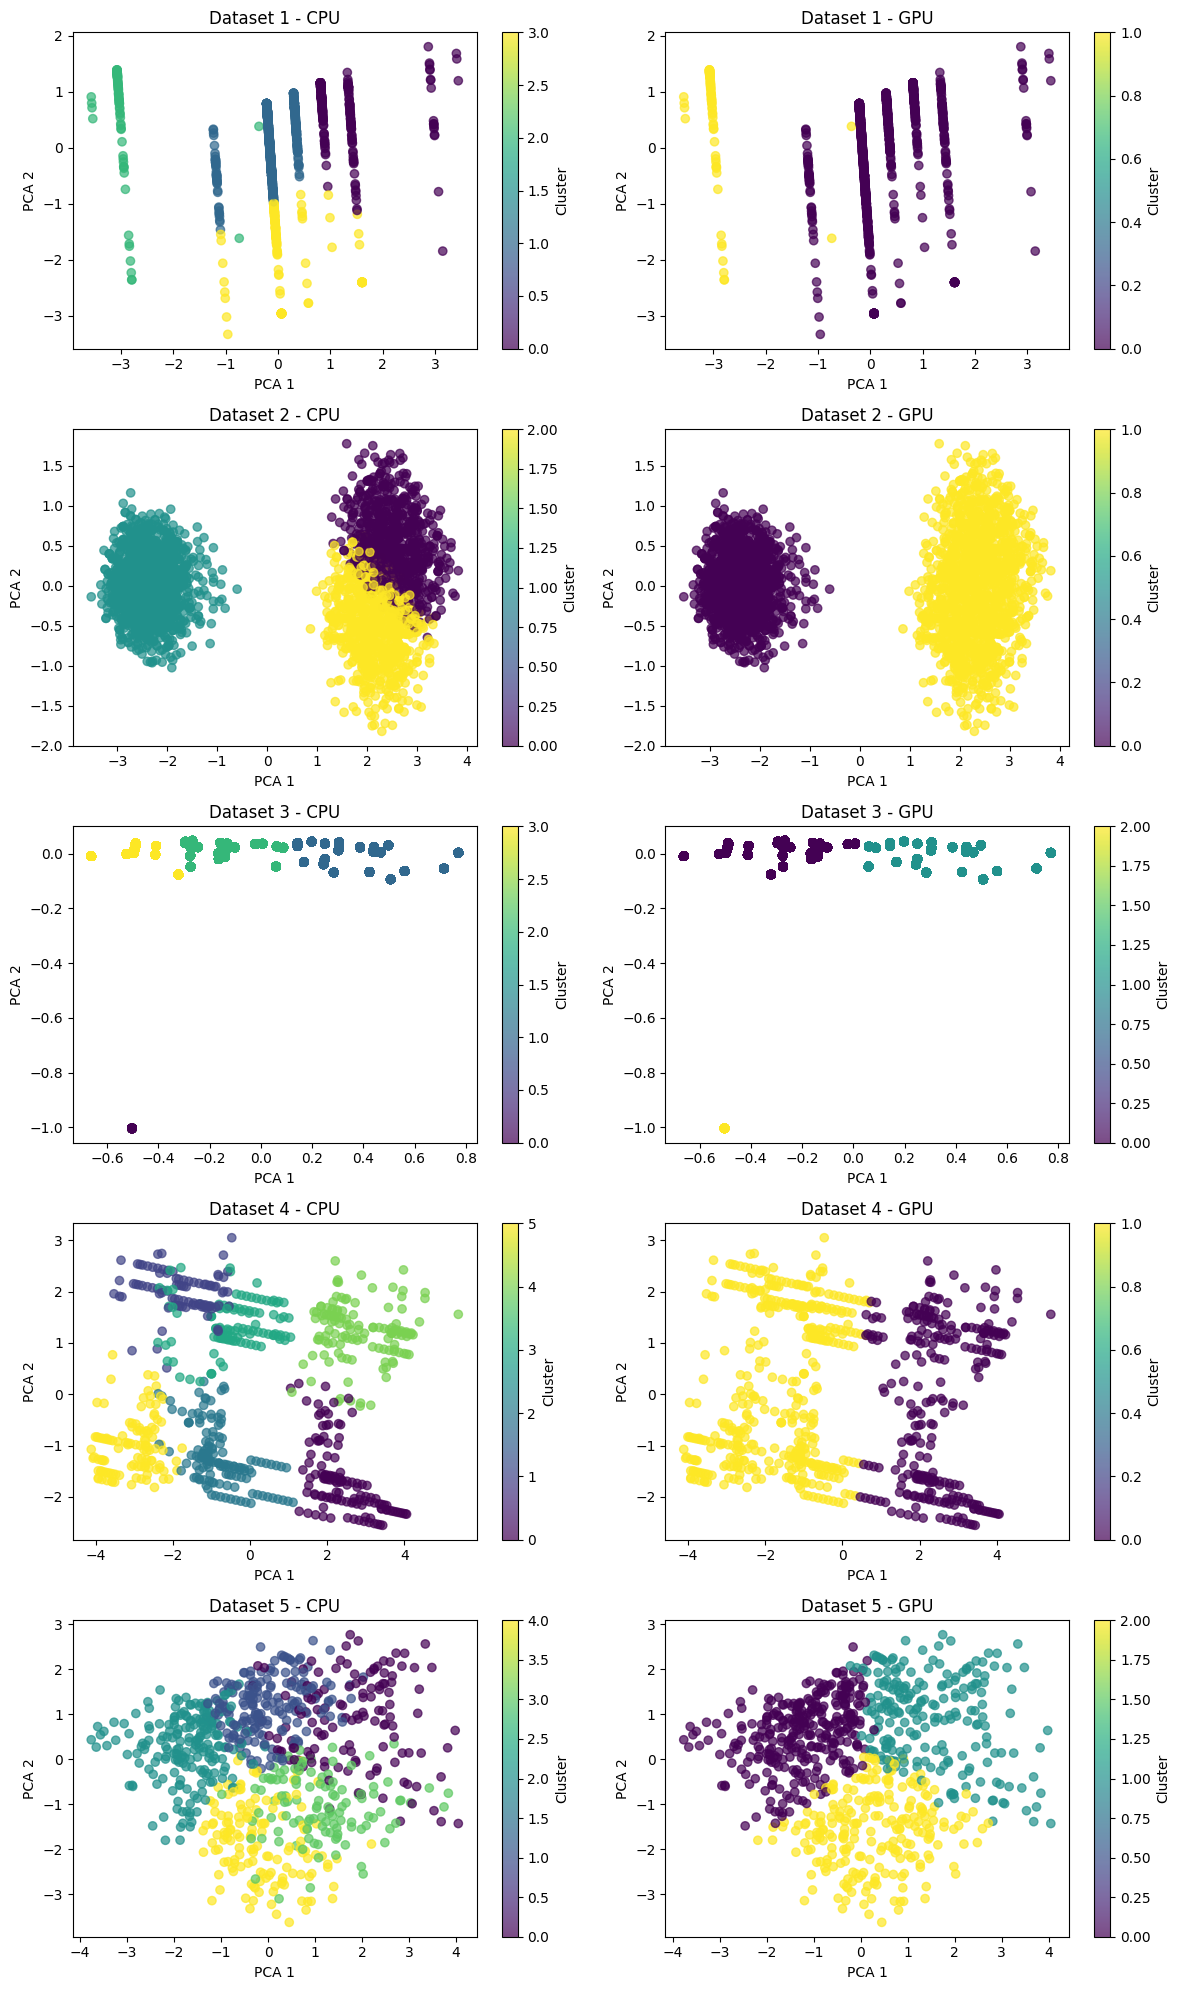

In [611]:
datasets_cudf = [df1, df2, df3, df4, df5]
datasets_np = [df1_np, df2_np, df3_np, df4_np, df5_np]
cpu_labels = [
    df1_cluster_labels_optimal_cpu,
    df2_cluster_labels_optimal_cpu,
    df3_cluster_labels_optimal_cpu,
    df4_cluster_labels_optimal_cpu,
    df5_cluster_labels_optimal_cpu
]
gpu_labels = [
    df1_cluster_labels_optimal_gpu,
    df2_cluster_labels_optimal_gpu,
    df3_cluster_labels_optimal_gpu,
    df4_cluster_labels_optimal_gpu,
    df5_cluster_labels_optimal_gpu
]
dataset_names = ["Dataset 1", "Dataset 2", "Dataset 3", "Dataset 4", "Dataset 5"]

plot_all_clusters_pca_subplot(
    datasets_cudf,
    datasets_np,
    cpu_labels,
    gpu_labels,
    dataset_names
)
